In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# Environment
class env:
    def __init__(self,n,m):
        self.state=[0,0]
        self.n=n
        self.m=m
        self.lake=np.zeros(shape=(n,n))
        t=0
        while(t<m):
            i=np.random.randint(low=0,high=n)
            j=np.random.randint(low=0,high=n)
            if((not self.lake[i][j]) and not(i==0 and j==0) and not(i==n-1 and j==n-1)):
                self.lake[i][j]=1
                t+=1
    def reset(self):
        self.state=[0,0]
    def take(self,action):
        done=False
        if(action==0 and self.state[1]+1<self.n):
            self.state[1]+=1
            done=True
        if(action==1 and self.state[0]+1<self.n):
            self.state[0]+=1
            done=True
        if(action==2 and self.state[1]-1>=0):
            self.state[1]-=1
            done=True
        if(action==3 and self.state[0]-1>=0):
            self.state[0]-=1
            done=True
            
        reward=0
        if(done and self.lake[self.state[0]][self.state[1]]):
            reward=-5
        if(done and self.state[0]==n-1 and self.state[1]==n-1):
            reward=+2000

        return [self.state,reward,done]
            
        

In [51]:
# Lake printing fucntion
def prin(s,a,loc=-1,agent=False):
    if(agent and loc==s):
        return u'\u2b1b'
    if(a==-1):
        return  'o'
    if(s==1):
        return mph[a]
    else:
        return mp[a]

def act_pol():
    l=en.lake 
    act_policy=np.zeros(shape=(n,n))
    for i in range(n):
        for j in range(n):
            act_policy[i][j]=np.argmax(Q[n*i+j,:])
    
    for i in range(n):
        for j in range(n):
            if(i==n-1 and j==n-1):
                print('⛳')
                continue
            if(i==0 and j==0):
                print('S',end="   ")
                continue
            if(act_policy[i][j]==0):
                print(prin(l[i][j],'right'),end='   ')
            if(act_policy[i][j]==1):
                print(prin(l[i][j],'down'),end='   ')
            if(act_policy[i][j]==2):
                print(prin(l[i][j],'left'),end='   ')
            if(act_policy[i][j]==3):
                print(prin(l[i][j],'up'),end='   ')
        print('\n')

In [52]:
# Printing helpers
mp={
    'right':u'\u21e8',
    'down':u'\u21e9',
    'left':u'\u21e6',
    'up':u'\u21e7'
}
mph={
    'right':u'\u2b1b',
    'down':u'\u2b1b',
    'left':u'\u2b1b',
    'up':u'\u2b1b'
}

In [53]:
n=6
m=8
en=env(n,m)
Q=np.random.rand(n*n,4)
act_pol()

S   ⇦   ⬛   ⬛   ⇧   ⇧   

⇩   ⬛   ⇩   ⬛   ⇧   ⇦   

⇦   ⇦   ⇧   ⇦   ⇨   ⇩   

⇨   ⇧   ⇩   ⬛   ⇦   ⬛   

⇧   ⇩   ⇨   ⇩   ⇧   ⬛   

⇩   ⇦   ⬛   ⇦   ⇨   ⛳




In [54]:
epochs=100000
alpha=0.7
lamda=0.6
epsilon=0.3
x=[]
y=[]

In [55]:
r_av=0
for ep in range(epochs):
    en.reset()
    tot_r=0
    goal=False
    s=n*en.state[0]+en.state[1]
    for i in range(500):
        if(s==(n*n-1)):
            break
        rand=np.random.uniform(low=0,high=1)
        if(rand<epsilon):
            act=np.random.randint(low=0,high=4)
        else:
            act=np.argmax(Q[s,:])
        state,reward,status = en.take(act)
        if(not status):
            continue
        new_s=state[0]*n+state[1]
        Q[s,act]=(1-alpha)*Q[s,act] + alpha*(reward + lamda*np.max(Q[new_s,:]))
        tot_r+=reward
        s=new_s
        if(en.lake[state[0]][state[1]]):
            break
        r_av+=tot_r
    if(ep%10000==0):
        x.append(ep)
        y.append(r_av/10000.0)
        r_av=0
        print("Epoch:%d "%(ep))
        act_pol()
        
            

Epoch:0 
S   ⇦   ⬛   ⬛   ⇧   ⇧   

⇦   ⬛   ⇩   ⬛   ⇧   ⇦   

⇦   ⇦   ⇧   ⇦   ⇨   ⇩   

⇨   ⇧   ⇩   ⬛   ⇦   ⬛   

⇧   ⇩   ⇨   ⇩   ⇧   ⬛   

⇩   ⇦   ⬛   ⇦   ⇨   ⛳


Epoch:10000 
S   ⇦   ⬛   ⬛   ⇩   ⇦   

⇩   ⬛   ⇩   ⬛   ⇩   ⇩   

⇨   ⇨   ⇨   ⇨   ⇩   ⇦   

⇨   ⇨   ⇩   ⬛   ⇩   ⬛   

⇨   ⇨   ⇨   ⇨   ⇩   ⬛   

⇧   ⇧   ⬛   ⇨   ⇨   ⛳


Epoch:20000 
S   ⇦   ⬛   ⬛   ⇩   ⇦   

⇩   ⬛   ⇩   ⬛   ⇩   ⇩   

⇨   ⇨   ⇨   ⇨   ⇩   ⇦   

⇨   ⇨   ⇩   ⬛   ⇩   ⬛   

⇨   ⇨   ⇨   ⇨   ⇩   ⬛   

⇧   ⇧   ⬛   ⇨   ⇨   ⛳


Epoch:30000 
S   ⇦   ⬛   ⬛   ⇩   ⇦   

⇩   ⬛   ⇩   ⬛   ⇩   ⇩   

⇨   ⇨   ⇨   ⇨   ⇩   ⇦   

⇨   ⇨   ⇩   ⬛   ⇩   ⬛   

⇨   ⇨   ⇨   ⇨   ⇩   ⬛   

⇧   ⇧   ⬛   ⇨   ⇨   ⛳


Epoch:40000 
S   ⇦   ⬛   ⬛   ⇩   ⇦   

⇩   ⬛   ⇩   ⬛   ⇩   ⇩   

⇨   ⇨   ⇨   ⇨   ⇩   ⇦   

⇨   ⇨   ⇩   ⬛   ⇩   ⬛   

⇨   ⇨   ⇨   ⇨   ⇩   ⬛   

⇧   ⇧   ⬛   ⇨   ⇨   ⛳


Epoch:50000 
S   ⇦   ⬛   ⬛   ⇩   ⇦   

⇩   ⬛   ⇩   ⬛   ⇩   ⇩   

⇨   ⇨   ⇨   ⇨   ⇩   ⇦   

⇨   ⇨   ⇩   ⬛   ⇩   ⬛   

⇨   ⇨   ⇨   ⇨   ⇩   ⬛   

⇧   ⇧   ⬛   ⇨   ⇨   ⛳


Ep

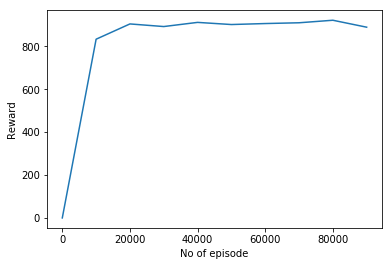

In [48]:
plt.xlabel("No of episode")
plt.ylabel("Reward")
plt.plot(x,y)